<a href="https://colab.research.google.com/github/trnq-eu/ml-zoomcamp-2024/blob/main/04_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 04. Evaluation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [ ]:
!wget 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'

--2024-09-27 03:24:37--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 977501 (955K) [text/plain]
Saving to: ‘WA_Fn-UseC_-Telco-Customer-Churn.csv’

WA_Fn-UseC_-Telco-C 100%[===================>] 954.59K  --.-KB/s    in 0.01s   

2024-09-27 03:24:37 (87.4 MB/s) - ‘WA_Fn-UseC_-Telco-Customer-Churn.csv’ saved [977501/977501]



In [ ]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
  df[c] = df[c].str.lower().str.replace(' ', '_')

df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)

df.churn = (df.churn == 'yes').astype(int)

In [ ]:
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,0
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.50,0
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,1
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,0
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,1


In [ ]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']

In [ ]:

numerical = ['tenure', 'monthlycharges', 'totalcharges']

categorical = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod',
]

In [ ]:

dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
churn_decision = (y_pred >= 0.5)
(y_val == churn_decision).mean()

0.8034066713981547

## 4.2 Accuracy and dummy model

In [ ]:
len(y_val)

1409

In [ ]:
(y_val == churn_decision).mean()

0.8034066713981547

In [ ]:
1132 / 1409

0.8034066713981547

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val, y_pred >= 0.5)


0.8034066713981547

In [ ]:
tresholds = np.linspace(0, 1, 21)
scores = []

for t in tresholds:
  score = accuracy_score(y_val, y_pred >= t)
  print('%.2f %.3f' % (t, score))
  scores.append(score)

0.00 0.274
0.05 0.509
0.10 0.591
0.15 0.667
0.20 0.710
0.25 0.739
0.30 0.760
0.35 0.772
0.40 0.785
0.45 0.793
0.50 0.803
0.55 0.801
0.60 0.795
0.65 0.786
0.70 0.765
0.75 0.744
0.80 0.735
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


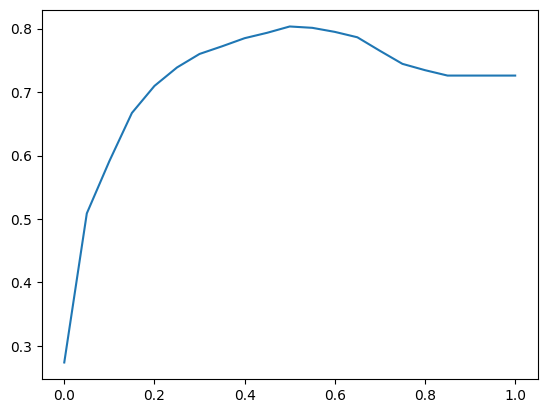

In [ ]:
plt.plot(tresholds, scores)

In [ ]:
from collections import Counter

Counter(y_pred >= 1.0)

Counter({False: 1409})

In [ ]:
1 - y_val.mean()

0.7260468417317246

## 4.3 Confusion table

- Different types of errors and correct decisions

- Arranging them in a table

In [ ]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [ ]:
t = 0.5
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)


In [ ]:
tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()

fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()



In [ ]:
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])

confusion_matrix

array([[922, 101],
       [176, 210]])

In [ ]:
(confusion_matrix / confusion_matrix.sum()).round(2)


array([[0.65, 0.07],
       [0.12, 0.15]])

## 4.4 Precision and recall

In [ ]:
# precisione
p = tp / (tp + fp)
p

0.6752411575562701

In [ ]:
r = tp / (tp + fn)
r

0.5440414507772021

## 4.5 ROC Curves

In [ ]:
tpr = tp / (tp + fn)
tpr

0.5440414507772021

In [ ]:
fpr = fp / (fp + tn)
fpr

0.09872922776148582

In [ ]:
scores = []

tresholds = np.linspace(0,1,101)

for t in tresholds:
  actual_positive = (y_val == 1)
  actual_negative = (y_val == 0)

  predict_positive = (y_pred >= t)
  predict_negative = (y_pred < t)

  tp = (predict_positive & actual_positive).sum()
  tn = (predict_negative & actual_negative).sum()

  fp = (predict_positive & actual_negative).sum()
  fn = (predict_negative & actual_positive).sum()

  scores.append((t, tp, fp, fn, tn))

In [ ]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)

df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

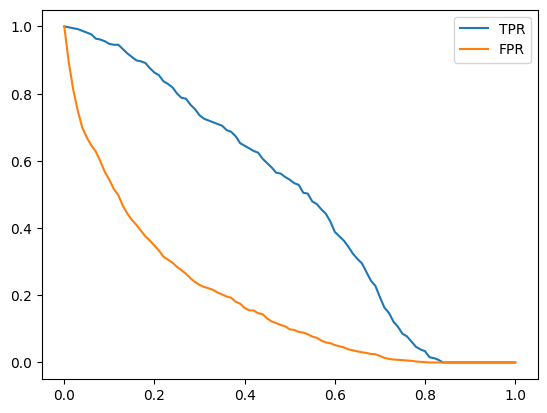

In [ ]:

plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR')
plt.legend()

## Explore more

https://deepchecks.com/f1-score-accuracy-roc-auc-and-pr-auc-metrics-for-models/

https://www.kaggle.com/code/mahmoudlimam/model-evaluation-tutorial



#### **Accuracy**:

$ Accuracy = \frac{Number \ of \ correct \ predictions}{Total \ number \ of \ predictions}$

In [ ]:
from sklearn.metrics import accuracy_score
y_true = [0, 1, 0, 1, 0, 1, 1, 0]
y_pred = [1, 1, 0, 1, 0, 0, 1, 0]
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy Score:", accuracy)

Accuracy Score: 0.75


#### **Precision**

Precision is the proportion of true positive predictions out of all positive predictions made by the model. It simply measures the accuracy of positive predictions.

$Precision = \frac{True \ positives}{True \ Positives + False \ Positives}$

In [ ]:
from sklearn.metrics import precision_score

y_true = [1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1]
y_pred = [1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1]
precision = precision_score(y_true, y_pred)
print("Precision Score:", precision)

Precision Score: 0.6


#### **Recall**:

$Recall = \frac{True \ Positives}{True \ positives \ + \ False \ negatives}$

In [ ]:
from sklearn.metrics import recall_score
y_true = [1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1]
y_pred = [1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1]
recall = recall_score(y_true, y_pred)
print("Recall Score:", recall)

Recall Score: 0.6


#### F1 score

The F1 score is a measure of a model’s accuracy that takes into account both precision and recall, where the goal is to classify instances correctly as positive or negative. Precision measures how many of the predicted positive instances were actually positive, while recall measures how many of the actual positive instances were correctly predicted. A high precision score means that the model has a low rate of false positives, while a high recall score means the model has a low rate of false negatives.

Mathematically speaking, the F1 score is a weighted harmonic mean of precision and recall. It ranges from 0 to 1, with 1 being the best possible score. The F1 score formula is:

$ F1 \ score = 2 \times  $

In [ ]:
from sklearn.metrics import f1_score

# Example data
y_true = [1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1]
y_pred = [1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1]

f1 = f1_score(y_true, y_pred)

f1

0.9

#### ROC - AUC

The **ROC curve** is a plot of the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings, and it is created by varying the threshold to predict a positive or negative outcome and plotting the TPR against the FPR for each threshold.

The **FPR** is the proportion of actual negative samples that are incorrectly identified as positive by the model.

The **AUC** is the area under the curve made by the ROC curve. The AUC formula is to integrate the area under the ROC curve using the trapezoidal rule.

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Example data
y_true = [0, 1, 0, 1, 0, 1, 1, 0]
y_scores = [0.6, 0.8, 0.3, 0.9, 0.2, 0.7, 0.5, 0.4]

# calculate the ROC curve

fpr, tpr, tresholds = roc_curve(y_true, y_scores)

# roc - auc score
roc_auc = roc_auc_score(y_true, y_scores)

# Print ROC-AUC Score
print('ROC-AUC Score:', roc_auc)

ROC-AUC Score: 0.9375


### Ideal model

In [ ]:

num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()
num_neg, num_pos

(1023, 386)

In [ ]:

y_ideal = np.repeat([0, 1], [num_neg, num_pos])
y_ideal

y_ideal_pred = np.linspace(0, 1, len(y_val))

## 2023 Homework

In [ ]:
!wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv

--2024-09-29 04:14:22--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]   1.41M  6.18MB/s    in 0.2s    

2024-09-29 04:14:23 (6.18 MB/s) - ‘data.csv’ saved [1475504/1475504]



In [ ]:
import pandas as pd

df = pd.read_csv('/content/data.csv')

In [ ]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [ ]:
df2 = df[['Make', 'Model', 'Year', 'Engine HP', 'Engine Cylinders', 'Transmission Type' , 'Vehicle Style', 'highway MPG', 'city mpg', 'MSRP']]
df2.columns = df2.columns.str.replace(' ','_').str.lower()
df2.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [ ]:
df2.isnull().sum()

,0
make,0
model,0
year,0
engine_hp,69
engine_cylinders,30
transmission_type,0
vehicle_style,0
highway_mpg,0
city_mpg,0
msrp,0


In [ ]:
df2 = df2.fillna(0)

Make the price binary (1 if above the average, 0 otherwise) - this will be our target variable above_average

In [ ]:
mean_price = df2.msrp.mean()
mean_price

40594.737032063116

In [ ]:
df2['above_average'] = (df2['msrp'] >= mean_price).astype(int)

In [ ]:
del df2['msrp']

In [ ]:
df2.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,0


Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use train_test_split function for that with random_state=1

In [ ]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df2, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

del df_train['above_average']
del df_val['above_average']
del df_test['above_average']


#### Question 1: ROC AUC feature importance


In [ ]:
df_train.dtypes

,0
make,object
model,object
year,int64
engine_hp,float64
engine_cylinders,float64
transmission_type,object
vehicle_style,object
highway_mpg,int64
city_mpg,int64


In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

numerical = ['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']

for n in numerical:
  auc = roc_auc_score(y_train, df_train[n])
  if auc < 0.5:
    auc = roc_auc_score(y_train, -df_train[n])
  print('%16s, %.3f' % (n, auc))

            year, 0.688
       engine_hp, 0.917
engine_cylinders, 0.766
     highway_mpg, 0.633
        city_mpg, 0.673


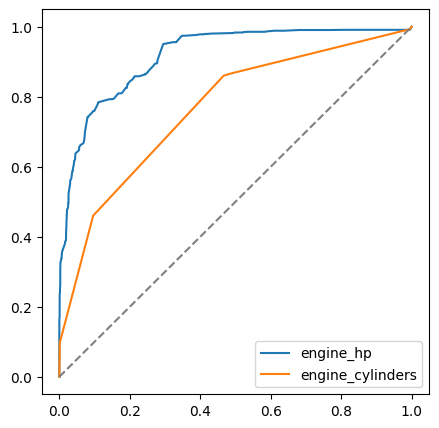

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))

fpr, tpr, treshold = roc_curve(y_train, df_train.engine_hp)
plt.plot(fpr, tpr, label='engine_hp')

fpr, tpr, _ = roc_curve(y_train, df_train.engine_cylinders)
plt.plot(fpr, tpr, label='engine_cylinders')

plt.plot([0, 1], [0, 1], color='grey', linestyle='--')

plt.legend()
plt.show()


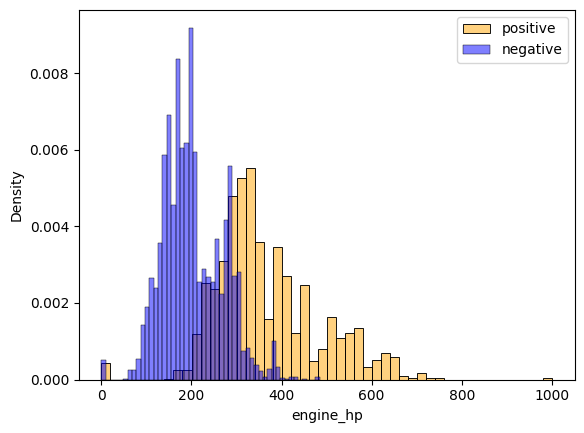

In [ ]:
import seaborn as sns

sns.histplot(df_train.engine_hp[y_train == 1],
             stat='density', bins=50,
             color='orange', alpha=0.5,
             label='positive')
sns.histplot(df_train.engine_hp[y_train == 0],
             stat='density', bins=50,
             color='blue', alpha=0.5,
             label='negative')

plt.legend()
plt.show()

### Question 2: Training the model

Apply one-hot-encoding using DictVectorizer and train the logistic regression with these parameters:



```
LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
```



In [ ]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [ ]:
train_dicts = df_train.to_dict(orient='records')
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

# crea il modello
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

# fitta il modello
model.fit(X_train, y_train)

# crea il dizionario di validazione
val_dicts = df_val.to_dict(orient='records')

# trasforma il dizionario di validazione
x_val = dv.transform(val_dicts)

# ottieni le predizioni
y_pred = model.predict_proba(x_val)[:, 1]


In [ ]:
# calcolo il roc_auc score

roc_auc = roc_auc_score(y_val, y_pred)
roc_auc

0.9797482414575607

### Question 3: Precision and Recall

Now let's compute precision and recall for our model.


- Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01

- For each threshold, compute precision and recall

- Plot them

In [ ]:
def confusion_matrix_dataframe(y_val, y_pred):
  scores = []
  tresholds = np.linspace(0, 1, 101)

  for t in tresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)

    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()

    scores.append((t, tp, tn, fp, fn))

  columns = ('treshold', 'tp', 'tn', 'fp', 'fn')
  df_scores = pd.DataFrame(scores, columns = columns)

  return df_scores

In [ ]:
import numpy as np

df_scores = confusion_matrix_dataframe(y_val, y_pred)

In [ ]:
df_scores[::10]


,treshold,tp,tn,fp,fn
0,0.0,654,0,1729,0
10,0.1,644,1399,330,10
20,0.2,623,1526,203,31
30,0.3,606,1596,133,48
40,0.4,593,1626,103,61
50,0.5,569,1660,69,85
60,0.6,552,1680,49,102
70,0.7,510,1703,26,144
80,0.8,467,1714,15,187
90,0.9,377,1726,3,277


In [ ]:
df_scores['precision'] = df_scores.tp / (df_scores.tp + df_scores.fp)
df_scores['recall'] = df_scores.tp / (df_scores.tp + df_scores.fn)

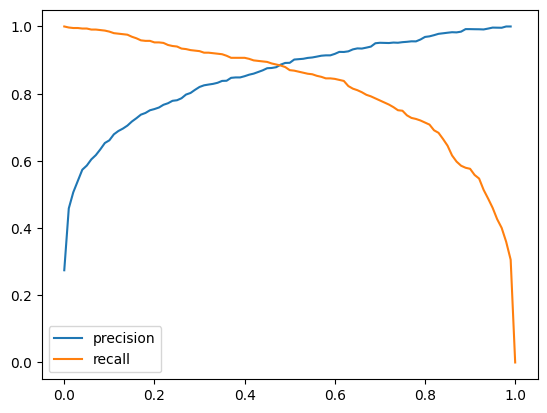

In [ ]:
plt.plot(df_scores.treshold, df_scores.precision, label = 'precision')
plt.plot(df_scores.treshold, df_scores.recall, label = 'recall')

plt.legend()
plt.show()

### Question 4: F1 score

Precision and recall are conflicting - when one grows, the other goes down.

That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

 $F_1 =  2 \times \frac{P \times R} {P + R}$

Where
 is precision and
 is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

In [ ]:
def f1_score(precision, recall):
  return 2 * (precision * recall) / (precision + recall)



In [ ]:
df_scores['f1'] = 2 * (df_scores.precision * df_scores.recall) / (df_scores.precision + df_scores.recall)

In [ ]:
df_scores.head()

,treshold,tp,tn,fp,fn,precision,recall,f1
0,0.00,654,0,1729,0,0.274444,1.000000,0.430688
1,0.01,652,959,770,2,0.458509,0.996942,0.628131
2,0.02,651,1095,634,3,0.506615,0.995413,0.671480
3,0.03,651,1175,554,3,0.540249,0.995413,0.700377
4,0.04,650,1246,483,4,0.573698,0.993884,0.727476


In [ ]:
df_scores.loc[df_scores.f1.argmax()]


,49
treshold,0.490000
tp,575.000000
tn,1659.000000
fp,70.000000
fn,79.000000
precision,0.891473
recall,0.879205
f1,0.885296


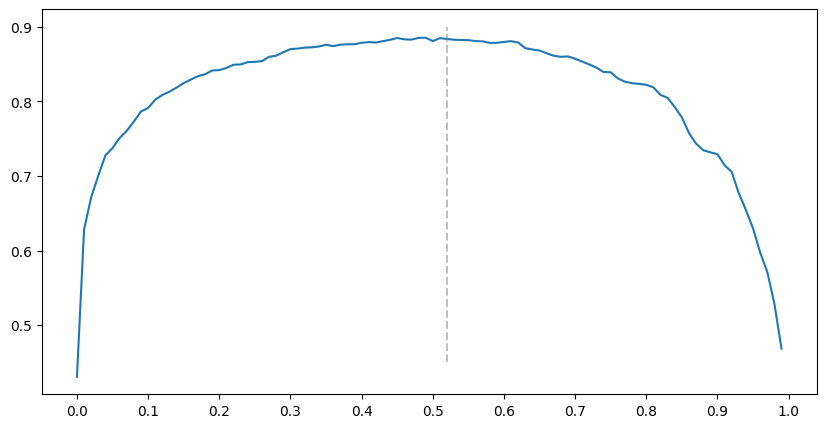

In [ ]:

plt.figure(figsize=(10, 5))

plt.plot(df_scores.treshold, df_scores.f1)
plt.vlines(0.52, 0.45, 0.9, color='grey', linestyle='--', alpha=0.5)

plt.xticks(np.linspace(0, 1, 11))
plt.show()

### Question 5: 5-Fold CV

Use the KFold class from Scikit-Learn to evaluate our model on 5 different folds:


```
KFold(n_splits=5, shuffle=True, random_state=1)
```




- Iterate over different folds of df_full_train
- Split the data into train and validation
- Train the model on train with these parameters: LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
- Use AUC to evaluate the model on validation
- How large is standard deviation of the scores across different folds?

In [ ]:
from sklearn.model_selection import KFold
columns = list(df2.columns)
columns.remove('above_average')
columns


['make',
 'model',
 'year',
 'engine_hp',
 'engine_cylinders',
 'transmission_type',
 'vehicle_style',
 'highway_mpg',
 'city_mpg']

In [ ]:
def train(df_train, y_train, C=1.0):
  dicts = df_train[columns].to_dict(orient='records')

  dv = DictVectorizer()
  X_train = dv.fit_transform(dicts)

  model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
  model.fit(X_train, y_train)
  return dv, model

def predict(df, dv, model):
  dicts = df[columns].to_dict(orient='records')

  X = dv.transform(dicts)
  y_pred = model.predict_proba(X)[:, 1]

  return y_pred


In [ ]:
scores = []

kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.above_average.values
    y_val = df_val.above_average.values

    dv, model = train(df_train, y_train, C=1.0)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

print('%.3f +- %.3f' % (np.mean(scores), np.std(scores)))

0.979 +- 0.002


### Question 6: Hyperparemeter Tuning

Now let's use 5-Fold cross-validation to find the best parameter C

- Iterate over the following C values: [0.01, 0.1, 0.5, 10]

- Initialize KFold with the same parameters as previously

- Use these parametes for the model: LogisticRegression(solver='liblinear', C=C, max_iter=1000)

- Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for C in [0.01, 0.1, 0.5, 10]:
  scores = []

  for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.above_average.values
    y_val = df_val.above_average.values

    dv, model = train(df_train, y_train, C=C)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

  print('C=%4s, %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))


C=0.01, 0.952 +- 0.003
C= 0.1, 0.972 +- 0.002
C= 0.5, 0.977 +- 0.002
C=  10, 0.981 +- 0.003
